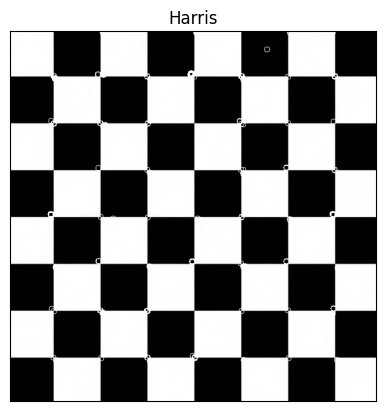

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time as Time
def sobel(image):
    kernel_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    kernel_horizontal_result = cv2.filter2D(image, -1, kernel_horizontal)
    kernel_vertical_result = cv2.filter2D(image, -1, kernel_vertical)
    return kernel_horizontal_result, kernel_vertical_result
def harris_operator(img, window_size, threshold):
    start_time = Time.time()
    img_gaussian = cv2.GaussianBlur(img, (3, 3), 0)
    height = img.shape[0]
    width = img.shape[1]
    matrix_R = np.zeros((height, width))
    dx, dy = sobel(img_gaussian)
    dx2 = np.square(dx)
    dy2 = np.square(dy)
    dxy = dx * dy
    offset = int(window_size / 2)
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            Sx2 = np.sum(dx2[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            Sy2 = np.sum(dy2[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            Sxy = np.sum(dxy[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            H = np.array([[Sx2, Sxy], [Sxy, Sy2]])
            eigenvalues = np.linalg.eigvals(H)
            min_eigenvalue = min(eigenvalues)
            max_eigenvalue = max(eigenvalues)
            # Apply threshold and mark corners
            if min_eigenvalue > threshold:
                cv2.circle(img, (x, y), 5, (255, 0, 0))
    end_time = Time.time()
    final_time = end_time - start_time
    return img, final_time
img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img, time = harris_operator(gray, 3, 80)
plt.figure("Harris detector")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Harris")
plt.xticks([])
plt.yticks([])
plt.savefig('Harris_detector', bbox_inches='tight')
plt.show()

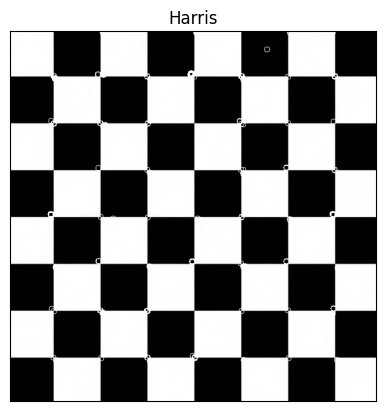

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time as Time

def sobel(image):
    kernel_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    kernel_horizontal_result = cv2.filter2D(image, -1, kernel_horizontal)
    kernel_vertical_result = cv2.filter2D(image, -1, kernel_vertical)
    return kernel_horizontal_result, kernel_vertical_result

def harris_operator(img, window_size, threshold):
    start_time = Time.time()
    img_gaussian = cv2.GaussianBlur(img, (3, 3), 0)
    height = img.shape[0]
    width = img.shape[1]
    # matrix_R = np.zeros((height, width))
    dx, dy = sobel(img_gaussian)
    dx2 = np.square(dx)
    dy2 = np.square(dy)
    dxy = dx * dy
    offset = int(window_size / 2)
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            Sx2 = np.sum(dx2[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            Sy2 = np.sum(dy2[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            Sxy = np.sum(dxy[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            H = np.array([[Sx2, Sxy], [Sxy, Sy2]])
            # eigenvalues = np.linalg.eigvals(H)
            eigenvalues, _ = np.linalg.eig(H)
            min_eigenvalue = min(eigenvalues)
            max_eigenvalue = max(eigenvalues)
            # Apply threshold and mark corners
            if min_eigenvalue > threshold:
                cv2.circle(img, (x, y), 5, (255, 0, 0))
    
    # Normalize the image
    img_normalized = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    
    end_time = Time.time()
    final_time = end_time - start_time
    return img_normalized, final_time

img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_normalized, time = harris_operator(gray, 3, 80)

plt.figure("Harris detector")
plt.imshow(cv2.cvtColor(img_normalized, cv2.COLOR_BGR2RGB))
plt.title("Harris")
plt.xticks([])
plt.yticks([])
plt.savefig('Harris_detector_normalized', bbox_inches='tight')
plt.show()


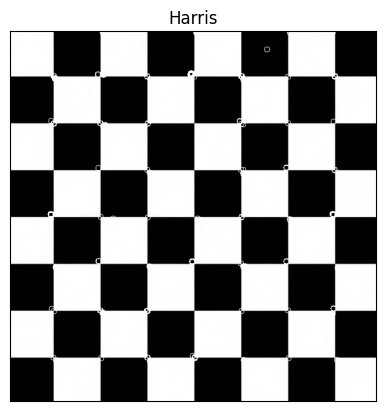

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time as Time

def sobel(image):
    kernel_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    kernel_horizontal_result = cv2.filter2D(image, -1, kernel_horizontal)
    kernel_vertical_result = cv2.filter2D(image, -1, kernel_vertical)
    return kernel_horizontal_result, kernel_vertical_result

def lambda_minus(img, window_size, threshold):
    start_time = Time.time()
    img_gaussian = cv2.GaussianBlur(img, (3, 3), 0)
    height = img.shape[0]
    width = img.shape[1]
    dx, dy = sobel(img_gaussian)
    dx2 = np.square(dx)
    dy2 = np.square(dy)
    dxy = dx * dy
    offset = int(window_size / 2)
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            Sx2 = np.sum(dx2[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            Sy2 = np.sum(dy2[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            Sxy = np.sum(dxy[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            H = np.array([[Sx2, Sxy], [Sxy, Sy2]])
            eigenvalues = np.linalg.eigvals(H)
            min_eigenvalue = min(eigenvalues)
            # Apply threshold and mark corners
            if min_eigenvalue > threshold:
                cv2.circle(img, (x, y), 5, (255, 0, 0))
    
    # Normalize the image
    img_normalized = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    
  
    end_time = Time.time()
    final_time = end_time - start_time
    return img_normalized, final_time

img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb, time = lambda_minus(gray, 3, 80)

plt.figure("Harris detector")
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.title("Harris")
plt.xticks([])
plt.yticks([])
plt.savefig('Harris_detector_normalized_RGB', bbox_inches='tight')
plt.show()


Image successfully read...
Finding Corners...


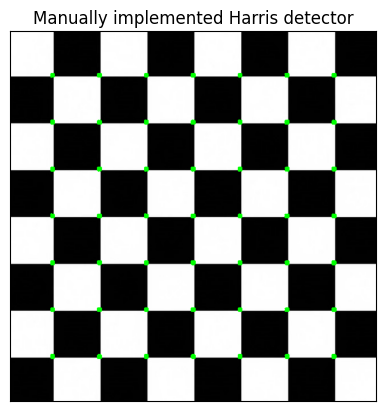

13.084002494812012


In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time as Time


def my_harris(img_dir,window_size,k,threshold):
    start_time = Time.time()

    img = cv2.imread(img_dir)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

    # Check if the image is exists
    if img is None:
        print('Invalid image:' + img_dir)
        return None
    else:
        print('Image successfully read...')
        
    height = img.shape[0]   #.shape[0] outputs height 
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image
    matrix_R = np.zeros((height,width))
    
    #   Step 1 - Calculate the x e y image derivatives (dx e dy)
    dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)
    # dy, dx = np.gradient(gray)
    dx = cv2.boxFilter(dx,-1,(3,3),dx,(-1,-1),True,cv2.BORDER_DEFAULT)
    dy = cv2.boxFilter(dy,-1,(3,3),dy,(-1,-1),True,cv2.BORDER_DEFAULT)
    #   Step 2 - Calculate product and second derivatives (dx2, dy2 e dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
    #   Step 3 - Calcular a soma dos produtos das derivadas para cada pixel (Sx2, Sy2 e Sxy)
    print ("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #   Step 5 - Calculate the response function ( R=det(H)-k(Trace(H))^2 )
            det=np.linalg.det(H)
            tr=np.matrix.trace(H)
            R=det-k*(tr**2)
            matrix_R[y-offset, x-offset]=R
    
    #   Step 6 - Apply a threshold
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                # cornerList.append([x, y, value])
                cv2.circle(img,(x,y),1,(0,255,0))
                
    # cv2.imwrite("%s_threshold_%s.png"%(img_dir[5:-4],threshold), img)
    plt.figure("Manually implemented Harris detector")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Manually implemented Harris detector")
    plt.xticks([]), plt.yticks([])
    # plt.savefig('My_harris_detector-thresh_%s.png'%(threshold), bbox_inches='tight')
    plt.show()
    end_time = Time.time()
    final_time = end_time - start_time
    
    return final_time

t =my_harris("1.jpg", 5, 0.04, 0.40) # Change this path to one that will lead to your image
print(t)

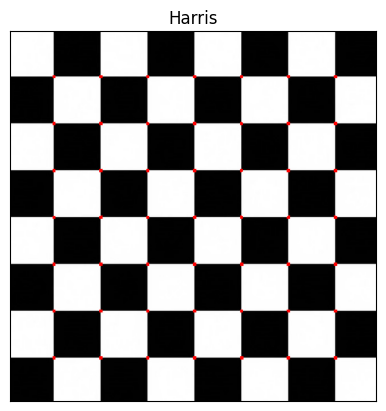

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def harris(img_dir):
    img = cv2.imread(img_dir)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # Turn image to gray

    harris = cv2.cornerHarris(gray,2,3,0.04)  # Applies harris corner detector to gray image

    # Result is dilated for marking the corners, not important
    harris = cv2.dilate(harris,None)

    # Threshold for an optimal value, it may vary depending on the image.
    img[harris>0.01*harris.max()]=[0,0,255]

    plt.figure("Harris detector")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Harris")
    plt.xticks([]), plt.yticks([])
    # plt.savefig('Harris_detector', bbox_inches='tight')
    plt.show()

harris("1.jpg")  # Change this path to one that will lead to your image

color edit 


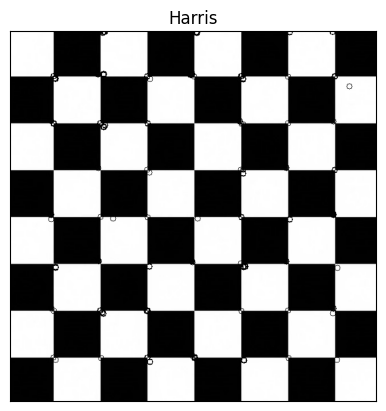

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time as Time

def sobel(image):
    kernel_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    kernel_horizontal_result = cv2.filter2D(image, -1, kernel_horizontal)
    kernel_vertical_result = cv2.filter2D(image, -1, kernel_vertical)
    return kernel_horizontal_result, kernel_vertical_result

def harris_operator(img, window_size, threshold):
    start_time = Time.time()
    img_gaussian = cv2.GaussianBlur(img, (3, 3), 0)
    height = img.shape[0]
    width = img.shape[1]
    matrix_R = np.zeros((height, width))
    dx, dy = sobel(img_gaussian)
    dx2 = np.square(dx)
    dy2 = np.square(dy)
    dxy = dx * dy
    offset = int(window_size / 2)
    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            Sx2 = np.sum(dx2[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            Sy2 = np.sum(dy2[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            Sxy = np.sum(dxy[y - offset:y + 1 + offset, x - offset:x + 1 + offset])
            H = np.array([[Sx2, Sxy], [Sxy, Sy2]])
            eigenvalues = np.linalg.eigvals(H)
            min_eigenvalue = min(eigenvalues)
            max_eigenvalue = max(eigenvalues)
            # Apply threshold and mark corners
            if min_eigenvalue > threshold:
                cv2.circle(img, (x, y), 5, (0, 255, 0))  # Change the color to (0, 255, 0) for green
    
    # Normalize the image
    img_normalized = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    
    # Convert the normalized grayscale image to RGB
    img_rgb = cv2.cvtColor(img_normalized, cv2.COLOR_GRAY2RGB)
    
    end_time = Time.time()
    final_time = end_time - start_time
    return img_rgb, final_time

img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb, time = harris_operator(gray, 3, 80)

plt.figure("Harris detector")
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.title("Harris")
plt.xticks([])
plt.yticks([])
# plt.savefig('Harris_detector_normalized_RGB', bbox_inches='tight')
plt.show()